### Using MNIST Fashion dataset we are building a model to recognize  the gien input image

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Importing MNIST Fashion datasets APL

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

Let us look at any sample image from our imported mnist

2


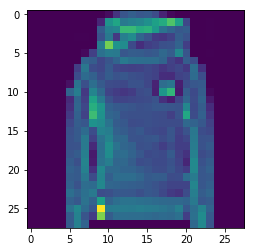

In [6]:
plt.imshow(train_images[54])
print(train_labels[54])

Lets Normalize our data, as NN works better with normalized data

In [7]:
train_images_1 = train_images/255
test_images_1 = test_images/255

Lets create the model

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.03137255 0.14901961
  0.2627451  0.30196078 0.27058824 0.28235294 0.23137255 0.09803922
  0.01960784 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.10588235 0.51372549 0.58823529
  0.40392157 0.43529412 0.45490196 0.50196078 0.56862745 0.61568627
  0.7254902  0.57254902 0.21176471 0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.29019608 0.43529412 0.45490196
  0.6745098  0.67843137 0.61960784 0.63921569 0.54117647 0.38039216
  0.32156863 0.2745098  0.29019608 0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00392157 0.

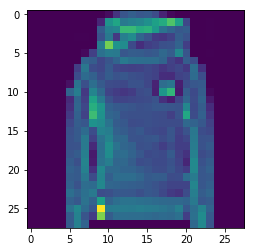

In [8]:
plt.imshow(train_images_1[54])
print(train_images_1[54])

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(200, activation = tf.nn.relu), tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images_1, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 102s 2ms/step - loss: 0.4885 - acc: 0.8275
Epoch 2/20
60000/60000 [==============================] - 27s 446us/step - loss: 0.3645 - acc: 0.8676
Epoch 3/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.3274 - acc: 0.8790
Epoch 4/20
60000/60000 [==============================] - 25s 418us/step - loss: 0.3029 - acc: 0.8887
Epoch 5/20
60000/60000 [==============================] - 24s 403us/step - loss: 0.2866 - acc: 0.8933
Epoch 6/20
60000/60000 [==============================] - 25s 419us/step - loss: 0.2731 - acc: 0.8983
Epoch 7/20
60000/60000 [==============================] - 25s 419us/step - loss: 0.2592 - acc: 0.9032
Epoch 8/20
60000/60000 [==============================] - 25s 422us/step - loss: 0.2485 - acc: 0.9071
Epoch 9/20
60000/60000 [==============================] - 26s 425us/step - loss: 0.2391 - acc: 0.9104
Epoch 10/20
60000/60000 [==============================] - 28s 466us/step - loss: 0

In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 248us/step


[2.0051833534717503, 0.874]

##### If we see we have got the training accuracy of about 93.66 but where as the testing accuracy of ~87, did we do overfitting !

### Lets try another model with few changes to reduce overfitting

In [13]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(130, activation = tf.nn.relu), tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [14]:
model2.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model2.fit(train_images_1, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 26s 438us/step - loss: 0.5034 - acc: 0.82311s - loss: 0.
Epoch 2/5
60000/60000 [==============================] - 25s 417us/step - loss: 0.3795 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 26s 432us/step - loss: 0.3410 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 27s 443us/step - loss: 0.3169 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 29s 485us/step - loss: 0.2958 - acc: 0.89140s - loss: 0.2961 - acc: 


In [16]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 303us/step


[2.0816784120168514, 0.8686]

### Lets look at the way it does the classification; i.e. the probability distribution for the each case

In [17]:
classifications = model2.predict(test_images)

print(classifications[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
print(test_labels[0])

9


### The list represents: The probability that this item is each of the 10 classes